### Packages

In [1]:
#requirements !pip freeze > requirements.txt.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Load and Organise data

## Import data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/askoshiyama/mli-cohort/master/german_credit.csv")
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


## Pre-process variables

In [3]:
# variable types
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [4]:
# categorical variables
cat_variables = ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex',
                'property', 'other_installment_plans', 'housing', 'job', 'telephone', "other_debtors", 'foreign_worker']

# target variable
output_variable = ["default"]

# other integer variables
int_variables = ['credits_this_bank', 'present_res_since', 'duration_in_month', 'people_under_maintenance', 
                 'installment_as_income_perc', 'age', 'credit_amount']
# list(set(df.columns) - set(output_variable) - set(cat_variables))

### Mapping categorical variables to one-hot encoding

In [5]:
animals = ["cat", "dog", "cat", "dog"]
# one-hot encoding
animals_cat = [1, 0, 1, 0]
animals_dog = [0, 1, 0, 1]
animals_not_cat = [0, 1, 0, 1] # 1 - animals_cat

# integer encoding
animals_int = [1, 2, 1, 2]

# binary encoding
animals = ["cat", "dog", "cat", "dog", "rat", "bat"] # 4 categories, log_2 (4) = 2
animals_0 = [0,     0,    0,      0,     1,     1]
animals_1 = [0,     1,    0,      1,     0,     1]

In [6]:
# pre-allocation
df_cat = pd.DataFrame(index=df.index)

# one-hot encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder

# I will do a loop for pedagogical reasons, but it is not entirely necessary
for cat in cat_variables:
    # one-hot encoding fitting
    one_hot_func = OneHotEncoder().fit(df[[cat]])
    
    # mapping
    cat_mapped = one_hot_func.transform(df[[cat]]).toarray()
    
    # storing
    for (k, cat_label) in enumerate(one_hot_func.categories_[0]):
        df_cat[cat + "_" + cat_label] = cat_mapped[:, k]

# quick check
df_cat.mean()

account_check_status_0 <= ... < 200 DM                                        0.269
account_check_status_< 0 DM                                                   0.274
account_check_status_>= 200 DM / salary assignments for at least 1 year       0.063
account_check_status_no checking account                                      0.394
credit_history_all credits at this bank paid back duly                        0.049
credit_history_critical account/ other credits existing (not at this bank)    0.293
credit_history_delay in paying off in the past                                0.088
credit_history_existing credits paid back duly till now                       0.530
credit_history_no credits taken/ all credits paid back duly                   0.040
purpose_(vacation - does not exist?)                                          0.050
purpose_business                                                              0.097
purpose_car (new)                                                           

In [7]:
# bracketing integer variable - age
from sklearn.preprocessing import KBinsDiscretizer
kbin_func = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='quantile').fit(df[["age"]])
df_age = pd.DataFrame(kbin_func.transform(df[["age"]]).toarray(), columns=["young", "adult", "senior"])

# checking
pd.concat([df_age, df[["age"]]], axis=1).head(10)

,young,adult,senior,age
0,0.0,0.0,1.0,67
1,1.0,0.0,0.0,22
2,0.0,0.0,1.0,49
3,0.0,0.0,1.0,45
4,0.0,0.0,1.0,53
5,0.0,1.0,0.0,35
6,0.0,0.0,1.0,53
7,0.0,1.0,0.0,35
8,0.0,0.0,1.0,61
9,0.0,1.0,0.0,28


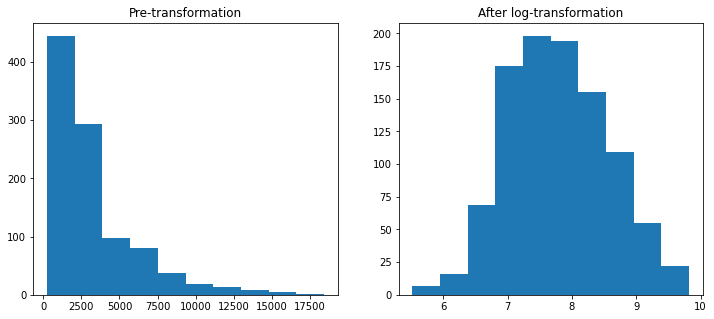

In [8]:
# other types of transformations possible - log transformation 
from sklearn.preprocessing import FunctionTransformer
log_mapping = FunctionTransformer(func=np.log, inverse_func=np.exp)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(df["credit_amount"])
ax1.set_title("Pre-transformation")

ax2.hist(log_mapping.transform(df["credit_amount"]))
ax2.set_title("After log-transformation")
df_log = pd.DataFrame(log_mapping.transform(df[["credit_amount"]]).values, columns=["log(credit)"])

## Consolidating a final dataset

In [9]:
df_model = pd.concat([df[int_variables], df_cat, df_age, df_log, df[output_variable]], axis=1)
df.shape, df_model.shape

((1000, 21), (1000, 66))

In [10]:
df_model.describe()

,credits_this_bank,present_res_since,duration_in_month,people_under_maintenance,installment_as_income_perc,age,credit_amount,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,other_debtors_co-applicant,other_debtors_guarantor,other_debtors_none,foreign_worker_no,foreign_worker_yes,young,adult,senior,log(credit),default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.407000,2.845000,20.903000,1.155000,2.973000,35.546000,3271.258000,0.269000,0.274000,0.063000,...,0.041000,0.052000,0.907000,0.037000,0.963000,0.291000,0.365000,0.344000,7.788691,0.300000
std,0.577654,1.103718,12.058814,0.362086,1.118715,11.375469,2822.736876,0.443662,0.446232,0.243085,...,0.198389,0.222138,0.290578,0.188856,0.188856,0.454451,0.481671,0.475279,0.776474,0.458487
min,1.000000,1.000000,4.000000,1.000000,1.000000,19.000000,250.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.521461,0.000000
25%,1.000000,2.000000,12.000000,1.000000,2.000000,27.000000,1365.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.219276,0.000000
50%,1.000000,3.000000,18.000000,1.000000,3.000000,33.000000,2319.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.749107,0.000000
75%,2.000000,4.000000,24.000000,1.000000,4.000000,42.000000,3972.250000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,8.287088,1.000000
max,4.000000,4.000000,72.000000,2.000000,4.000000,75.000000,18424.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.821409,1.000000


# Modelling

## Quick modelling with Tree-based Model

In [11]:
df_model[output_variable].describe()

,default
count,1000.000000
mean,0.300000
std,0.458487
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
# separate data
X, y = df_model.drop(labels=output_variable, axis=1), df_model[output_variable]

# fit model
from sklearn.tree import DecisionTreeClassifier
#class_tree = DecisionTreeClassifier(max_depth=2, criterion="gini")
class_tree = DecisionTreeClassifier(max_depth=5, criterion="gini", class_weight="balanced")
class_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Getting node variables + Plotting Decision Tree

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(class_tree, out_file="class_tree.dot", feature_names=X.columns, 
                class_names = ["No Default", "Default"], rounded = True)

#### go to http://webgraphviz.com/ and paste class_tree.dot text

### Some exploratory analysis

In [14]:
pd.crosstab(X["account_check_status_no checking account"] <=0.5, y[output_variable[0]]==1)

default,False,True
account_check_status_no checking account,,
False,348,46
True,352,254


Text(0.5, 0, 'duration_in_month')

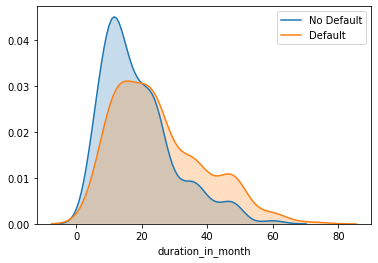

In [15]:
nodefault_duration = X.loc[((y.values == 0) & 
                            (X["account_check_status_no checking account"].values.reshape(-1, 1) <= 0.5)).reshape(1, -1)[0], 
                           "duration_in_month"]
default_duration = X.loc[((y.values == 1) & 
                          (X["account_check_status_no checking account"].values.reshape(-1, 1) <= 0.5)).reshape(1, -1)[0], 
                         "duration_in_month"]
ax = sns.kdeplot(nodefault_duration, shade=True, shade_lowest=False, label="No Default")
ax = sns.kdeplot(default_duration, shade=True, shade_lowest=False, label="Default")
ax.set_xlabel("duration_in_month")

## Cross-validating Tree-Based Model

### Initial Params

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 10-fold cv
k_folds = StratifiedKFold(n_splits=10, random_state=10)

# performance metrics
perf_metrics = {"Accuracy": metrics.accuracy_score, 
                "Precision": metrics.precision_score, 
                "Recall": metrics.recall_score,
                "AUC": metrics.roc_auc_score, 
                "F1-Score": metrics.f1_score, 
                "Brier": metrics.brier_score_loss
               }

# model
#model = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=10)
model = DecisionTreeClassifier(max_depth=2, criterion="gini", class_weight="balanced", random_state=10)

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### Fit model

In [17]:
# pre-allocation
X, y = df_model.drop(labels=output_variable, axis=1).values, df_model[output_variable].values
df_metrics = pd.DataFrame(index=range(10), columns=perf_metrics.keys())

# main loop
k = 0
for (train, test) in k_folds.split(X, y):
    # fit model
    model.fit(X[train], y[train])
       
    # test model
    ypred_class = model.predict(X[test])
    ypred_prob = model.predict_proba(X[test])[:, 1]

    # compute performance metrics
    for pf in perf_metrics.keys():
        if pf in ["AUC", "Brier"]:
            df_metrics.loc[k, pf] = perf_metrics[pf](y[test], ypred_prob)
        else:
            df_metrics.loc[k, pf] = perf_metrics[pf](y[test], ypred_class)
    k += 1

### Show results

In [18]:
df_metrics.mean()

Accuracy     0.611000
Precision    0.422096
Recall       0.796667
AUC          0.702476
F1-Score     0.548327
Brier        0.215084
dtype: float64

In [19]:
df_metrics.mean()

Accuracy     0.611000
Precision    0.422096
Recall       0.796667
AUC          0.702476
F1-Score     0.548327
Brier        0.215084
dtype: float64

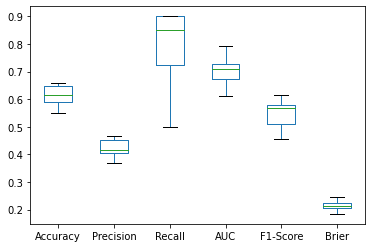

In [20]:
df_metrics.plot(kind="box")

## Hyper-parameter tuning + Cross-validation: GBT

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# params
k_folds = StratifiedKFold(n_splits=10, random_state=10) # k-fold
hyper_params = {"learning_rate": [10.0 ** -2, 0.5, 10.0 ** -1, 1.5, 10.0 ** 0],
                "max_depth": [1, 2, 3],
                "max_features": [0.1, 0.25, 0.5],
                "n_estimators": [50, 100]
                }

# performance metrics
perf_metrics = {"Accuracy": metrics.accuracy_score, 
                "Precision": metrics.precision_score, 
                "Recall": metrics.recall_score,
                "AUC": metrics.roc_auc_score, 
                "F1-Score": metrics.f1_score, 
                "Brier": metrics.brier_score_loss}

for pf in perf_metrics:
    perf_metrics[pf] = metrics.make_scorer(perf_metrics[pf])

# main method
X, y = df_model.drop(labels=output_variable, axis=1).values, df_model[output_variable].values

model = GridSearchCV(estimator=GradientBoostingClassifier(random_state=10), 
                     param_grid=hyper_params, 
                     scoring=perf_metrics, 
                     cv=k_folds, 
                     refit="F1-Score")

model.fit(X, y.ravel())

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-pack

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-pack

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-pack

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-pack

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-pack

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,...
                         'max_features': [0.1, 0.25, 0.5],
                         'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit

### Show results

In [22]:
# get best model
best_model = model.best_estimator_
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
# store all results and avg results in a df
df_cv = pd.DataFrame(model.cv_results_)

# add a hyperparameter column in avg df
from sklearn.model_selection import ParameterGrid
df_hyperparams = pd.DataFrame(list(ParameterGrid(model.param_grid)))
df_avgcv = pd.DataFrame(columns=perf_metrics.keys())
for pf in perf_metrics.keys():
    df_avgcv[pf] = df_cv["mean_test_" + pf]
df_avgcv = pd.concat([df_hyperparams, df_avgcv], axis=1)

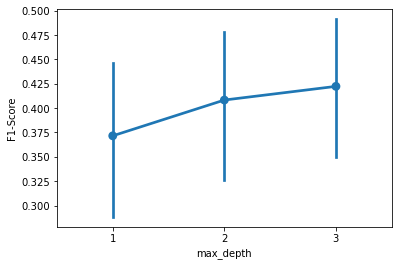

In [24]:
sns.pointplot(x="max_depth", y="F1-Score", data=df_avgcv)

In [25]:
df_avgcv.loc[df_avgcv["F1-Score"].idxmax()]

learning_rate      0.500000
max_depth          3.000000
max_features       0.100000
n_estimators     100.000000
Accuracy           0.764000
Precision          0.628846
Recall             0.540000
AUC                0.700000
F1-Score           0.576072
Brier              0.236000
Name: 31, dtype: float64

### Feature Importance chart

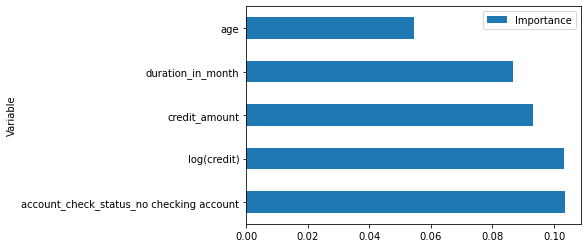

In [26]:
df_featimp = pd.DataFrame({"Variable": df_model.drop(output_variable, axis=1).columns,
                           "Importance": best_model.feature_importances_})
df_featimp = df_featimp.sort_values("Importance", ascending=False)

# chart
df_featimp.iloc[:5].plot(x="Variable", y="Importance", kind="barh")

### Partial dependency plot

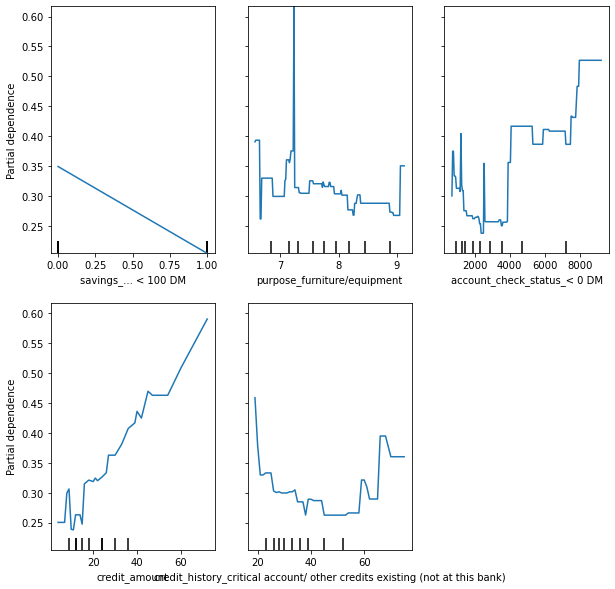

In [27]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(10, 10))
plot_partial_dependence(best_model, X, df_featimp.iloc[:5].index, response_method="predict_proba", 
                        method="brute", grid_resolution=200, ax=ax, 
                        feature_names=df_featimp["Variable"])

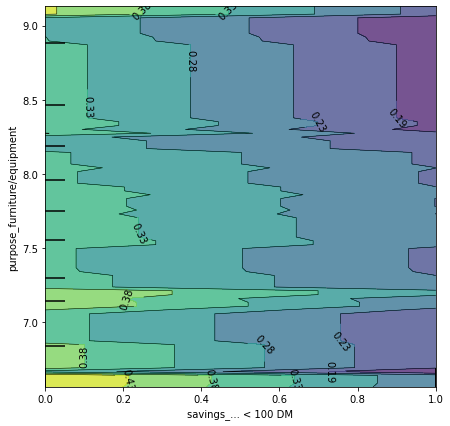

In [28]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_partial_dependence(best_model, X, [(df_featimp.index[0], df_featimp.index[1])], 
                        feature_names=df_featimp["Variable"], ax=ax, 
                        response_method="predict_proba", method="brute")

## Hyper-parameter tuning + Cross-validation: Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# params
k_folds = StratifiedKFold(n_splits=10, random_state=10) # k-fold
hyper_params = {"max_depth": [1, 3, 7, None],
                "max_features": [0.1, 0.25, 0.5],
                "n_estimators": [200]
                }

# performance metrics
perf_metrics = {"Accuracy": metrics.accuracy_score, 
                "Precision": metrics.precision_score, 
                "Recall": metrics.recall_score,
                "AUC": metrics.roc_auc_score, 
                "F1-Score": metrics.f1_score, 
                "Brier": metrics.brier_score_loss}

for pf in perf_metrics:
    perf_metrics[pf] = metrics.make_scorer(perf_metrics[pf])

# main method
X, y = df_model.drop(labels=output_variable, axis=1).values, df_model[output_variable].values

model = GridSearchCV(estimator=RandomForestClassifier(random_state=10), 
                     param_grid=hyper_params, 
                     scoring=perf_metrics, 
                     cv=k_folds, 
                     refit="F1-Score")

model.fit(X, y.ravel())

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-pack

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              m...
                         'max_features': [0.1, 0.25, 0.5],
                         'n_estimators': [200]},
             pre_dispatch='2*n_jobs'

### Show results

In [30]:
# get best model
best_model = model.best_estimator_
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [31]:
# store all results and avg results in a df
df_cv = pd.DataFrame(model.cv_results_)

# add a hyperparameter column in avg df
from sklearn.model_selection import ParameterGrid
df_hyperparams = pd.DataFrame(list(ParameterGrid(model.param_grid)))
df_avgcv = pd.DataFrame(columns=perf_metrics.keys())
for pf in perf_metrics.keys():
    df_avgcv[pf] = df_cv["mean_test_" + pf]
df_avgcv = pd.concat([df_hyperparams, df_avgcv], axis=1)

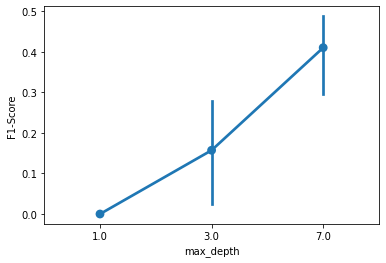

In [32]:
sns.pointplot(x="max_depth", y="F1-Score", data=df_avgcv)

In [33]:
df_avgcv.loc[df_avgcv["F1-Score"].idxmax()]

max_depth              NaN
max_features      0.500000
n_estimators    200.000000
Accuracy          0.753000
Precision         0.631412
Recall            0.426667
AUC               0.659762
F1-Score          0.504784
Brier             0.247000
Name: 11, dtype: float64

### Feature Importance chart

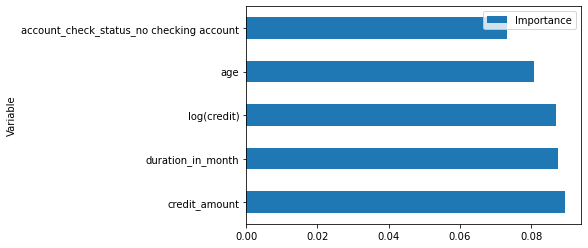

In [34]:
df_featimp = pd.DataFrame({"Variable": df_model.drop(output_variable, axis=1).columns,
                           "Importance": best_model.feature_importances_})
df_featimp = df_featimp.sort_values("Importance", ascending=False)

# chart
df_featimp.iloc[:5].plot(x="Variable", y="Importance", kind="barh")

### Partial dependency plot

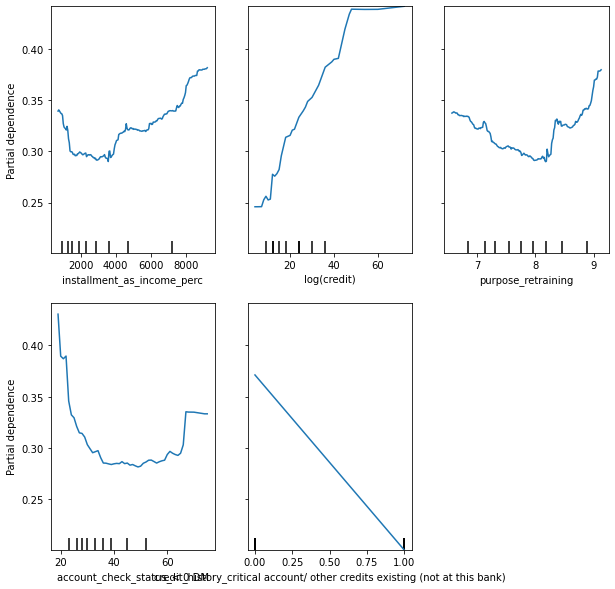

In [35]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(10, 10))
plot_partial_dependence(best_model, X, df_featimp.iloc[:5].index, response_method="predict_proba", 
                        method="brute", grid_resolution=200, ax=ax, 
                        feature_names=df_featimp["Variable"])

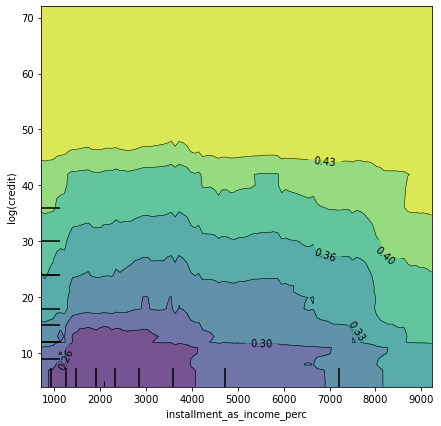

In [36]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_partial_dependence(best_model, X, [(df_featimp.index[0], df_featimp.index[1])], 
                        feature_names=df_featimp["Variable"], ax=ax, 
                        response_method="predict_proba", method="brute")

# Other Topics

## Scalable models

### Create dataset with different sizes

In [37]:
# small
df_model_small = df_model.copy()

# medium
for k in range(10):
    if k==0:
        df_model_medium = df_model.copy()
    else:
        df_model_medium = pd.concat([df_model_medium, df_model.copy()], axis=0, ignore_index=True)
        
# large
for k in range(100):
    if k==0:
        df_model_large = df_model.copy()
    else:
        df_model_large = pd.concat([df_model_large, df_model.copy()], axis=0, ignore_index=True)

### GBT

In [39]:
from time import time
from sklearn.ensemble import GradientBoostingClassifier
# small
start = time()
GradientBoostingClassifier(n_estimators=100).fit(df_model_small.drop(output_variable, axis=1), 
                                                 df_model_small[output_variable])
print(time() - start)

# medium
start = time()
GradientBoostingClassifier(n_estimators=100).fit(df_model_medium.drop(output_variable, axis=1), 
                                                 df_model_medium[output_variable])
print(time() - start)

# large
start = time()
GradientBoostingClassifier(n_estimators=100).fit(df_model_large.drop(output_variable, axis=1), 
                                                 df_model_large[output_variable])
print(time() - start)

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5092313289642334


C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.3683485984802246


C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


24.69099760055542


### LightGBM - https://lightgbm.readthedocs.io/en/latest/index.html

In [ ]:
#!pip install lightgbm - install it first!

In [40]:
from lightgbm import LGBMClassifier
from time import time
from sklearn.ensemble import GradientBoostingClassifier
# small
start = time()
LGBMClassifier(n_estimators=100).fit(df_model_small.drop(output_variable, axis=1).values, 
                                                 df_model_small[output_variable].values)
print(time() - start)

# medium
start = time()
LGBMClassifier(n_estimators=100).fit(df_model_medium.drop(output_variable, axis=1).values, 
                                                 df_model_medium[output_variable].values)
print(time() - start)

# large
start = time()
LGBMClassifier(n_estimators=100).fit(df_model_large.drop(output_variable, axis=1).values, 
                                                 df_model_large[output_variable].values)
print(time() - start)

C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-v

0.12963080406188965
0.23787522315979004


C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Koshiyama\Anaconda3-64bit\envs\mli4\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.034231424331665
